In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
data = pd.read_csv("updated_cleaned_data.csv")

In [301]:
data

,Property ID,Zip code,City,Type of Property,Subtype of Property,Price (€),Construction year,Bedrooms,Living area (m²),Kitchen type,...,Elevator,Basement,Primary energy consumption (kWh/m²),CO₂ emission (kg CO₂/m²),Energy class,Heating type,Kitchen type scale,Building condition scale,Region,Price per m²
0,10583186,1341,céroux-mousty,apartment,duplex,415000,2016.0,2.0,139.0,USA hyper equipped,...,1,0,116.0,NaN,B,Gas,3.0,6.0,Walloon,2985.611511
1,10463775,1180,uccle,apartment,penthouse,1650000,2021.0,3.0,235.0,USA hyper equipped,...,1,1,62.0,9.0,B,Gas,3.0,6.0,Brussels capital region,7021.276596
2,10582739,1180,uccle,apartment,flat studio,159000,1977.0,1.0,30.0,Installed,...,1,0,316.0,NaN,F,Electric,2.0,4.0,Brussels capital region,5300.000000
3,10582752,4300,waremme,house,mansion,495000,1918.0,6.0,250.0,Installed,...,0,0,130.0,25.0,B,Gas,2.0,6.0,Walloon,1980.000000
4,10579605,1332,rixensart genval,house,villa,530000,1928.0,4.0,176.0,USA hyper equipped,...,0,1,394.0,69.0,E,Gas,3.0,4.0,Walloon,3011.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,10559545,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,31.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15142,10559544,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,30.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15143,10559543,8420,de haan,apartment,apartment,229000,NaN,1.0,78.0,Hyper equipped,...,0,0,326.0,NaN,D,Electric,3.0,4.0,Flemish,2935.897436
15144,10559540,1400,nivelles,apartment,apartment,170000,NaN,1.0,70.0,Installed,...,1,0,278.0,79.0,D,Electric,2.0,NaN,Walloon,2428.571429


In [302]:
data.info

<bound method DataFrame.info of        Property ID  Zip code              City Type of Property   
0         10583186      1341     céroux-mousty        apartment  \
1         10463775      1180             uccle        apartment   
2         10582739      1180             uccle        apartment   
3         10582752      4300           waremme            house   
4         10579605      1332  rixensart genval            house   
...            ...       ...               ...              ...   
15141     10559545      9340              lede            house   
15142     10559544      9340              lede            house   
15143     10559543      8420           de haan        apartment   
15144     10559540      1400          nivelles        apartment   
15145     10559539      7062             naast            house   

      Subtype of Property  Price (€)  Construction year  Bedrooms   
0                  duplex     415000             2016.0       2.0  \
1               penthouse

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15146 entries, 0 to 15145
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Property ID                          15146 non-null  int64  
 1   Zip code                             15146 non-null  int64  
 2   City                                 15146 non-null  object 
 3   Type of Property                     15146 non-null  object 
 4   Subtype of Property                  15146 non-null  object 
 5   Price (€)                            15146 non-null  int64  
 6   Construction year                    9869 non-null   float64
 7   Bedrooms                             15146 non-null  float64
 8   Living area (m²)                     15146 non-null  float64
 9   Kitchen type                         10515 non-null  object 
 10  Furnished                            15146 non-null  int64  
 11  How many fireplaces?        

In [304]:
# def subset_by_iqr(df, column, whisker_width=1.5):
#     """Remove outliers from a dataframe by column, including optional 
#        whiskers, removing rows for which the column value are 
#        less than Q1-1.5IQR or greater than Q3+1.5IQR.
#     Args:
#         df (`:obj:pd.DataFrame`): A pandas dataframe to subset
#         column (str): Name of the column to calculate the subset from.
#         whisker_width (float): Optional, loosen the IQR filter by a
#                                factor of `whisker_width` * IQR.
#     Returns:
#         (`:obj:pd.DataFrame`): Filtered dataframe
#     """
#     # Calculate Q1, Q2 and IQR
#     q1 = df[column].quantile(0.25)                 
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     # Apply filter with respect to IQR, including optional whiskers
#     filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
#     return df.loc[filter]                                                     

# # Example for whiskers = 1.5, as requested by the OP
# #df_filtered = subset_by_iqr(data, 'Terrace surface (m²)', whisker_width=1.5)
# data = subset_by_iqr(data, 'Terrace surface (m²)', whisker_width=1.5)

In [305]:
from sklearn.model_selection import train_test_split

#X = data.drop(["Price (€)"])
X = data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool', 'Elevator']]
y = data["Price (€)"]

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [307]:
train_data = X_train.join(y_train)

In [308]:
train_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator,Price (€)
1076,250.0,1950,0.0,15.0,156.0,0,2.0,4.0,0,0,625000
10705,192.0,2000,0.0,22.0,0.0,0,3.0,3.0,0,1,1455000
2166,120.0,8300,0.0,0.0,0.0,0,NaN,3.0,0,1,1875000
1014,147.0,4210,0.0,0.0,3750.0,0,1.0,2.0,0,0,179000
2061,107.0,1210,0.0,0.0,0.0,0,0.0,2.0,0,0,180000
...,...,...,...,...,...,...,...,...,...,...,...
11791,231.0,5360,1.0,0.0,0.0,0,2.0,4.0,0,0,300000
1363,126.0,3440,0.0,24.0,416.0,0,NaN,4.0,0,0,175000
2964,203.0,1700,0.0,25.0,2910.0,0,0.0,4.0,0,0,1800000
631,275.0,8200,1.0,0.0,0.0,0,NaN,3.0,0,0,995000


array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Swimming pool'}>],
       [<Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price (€)'}>, <Axes: >]], dtype=object)

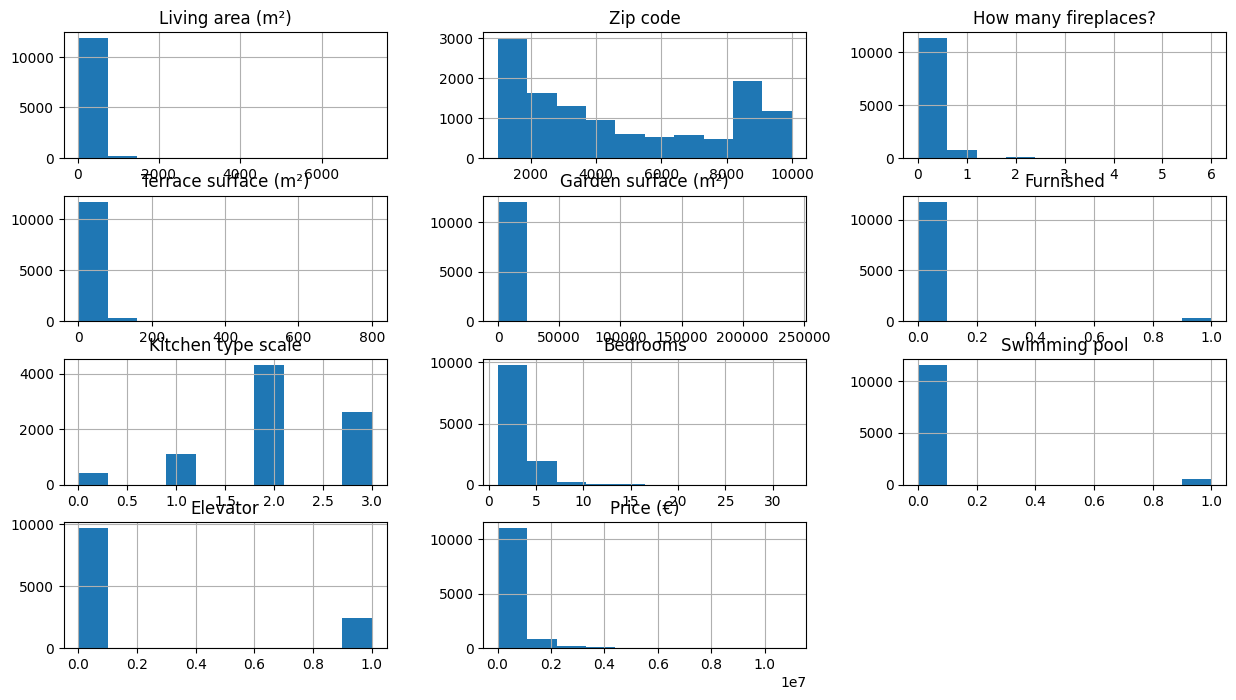

In [309]:
train_data.hist(figsize=(15, 8))

In [310]:
train_data.corr()

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator,Price (€)
Living area (m²),1.000000,-0.073167,0.151267,0.131659,0.122296,-0.019796,0.050972,0.632674,0.251807,-0.159440,0.556010
Zip code,-0.073167,1.000000,-0.034811,-0.091506,-0.014167,0.048040,-0.018631,-0.065650,-0.059582,-0.024363,-0.113965
How many fireplaces?,0.151267,-0.034811,1.000000,0.094941,0.047583,-0.011992,0.006802,0.098954,0.103909,-0.076065,0.110116
Terrace surface (m²),0.131659,-0.091506,0.094941,1.000000,0.059490,0.040507,0.143764,0.116049,0.137957,0.090045,0.199086
Garden surface (m²),0.122296,-0.014167,0.047583,0.059490,1.000000,-0.004336,0.006078,0.114439,0.036499,-0.016770,0.118210
Furnished,-0.019796,0.048040,-0.011992,0.040507,-0.004336,1.000000,0.040860,-0.001541,0.001047,0.096624,0.034986
Kitchen type scale,0.050972,-0.018631,0.006802,0.143764,0.006078,0.040860,1.000000,-0.020866,0.145646,0.169900,0.238532
Bedrooms,0.632674,-0.065650,0.098954,0.116049,0.114439,-0.001541,-0.020866,1.000000,0.144094,-0.227386,0.422097
Swimming pool,0.251807,-0.059582,0.103909,0.137957,0.036499,0.001047,0.145646,0.144094,1.000000,-0.051814,0.305815
Elevator,-0.159440,-0.024363,-0.076065,0.090045,-0.016770,0.096624,0.169900,-0.227386,-0.051814,1.000000,0.039020


<Axes: >

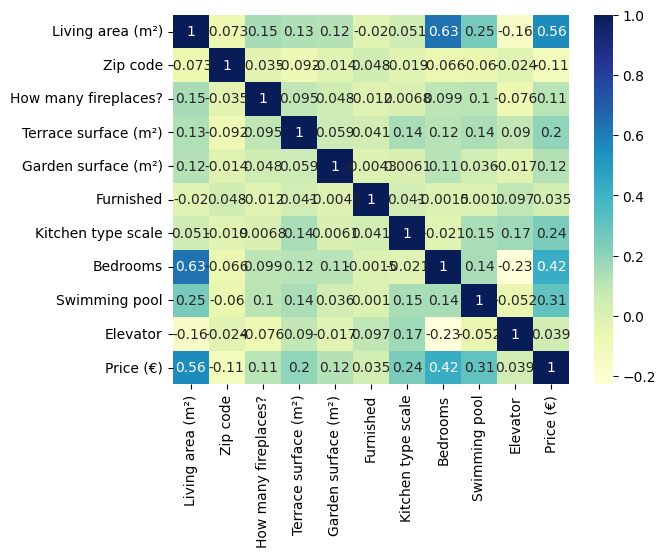

In [311]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [312]:
train_data['Terrace surface (m²)'] = np.log(train_data['Terrace surface (m²)'] + 1)
train_data['Garden surface (m²)'] = np.log(train_data['Garden surface (m²)'] + 1)
train_data['Living area (m²)'] = np.log(train_data['Living area (m²)'] + 1)
train_data['How many fireplaces?'] = np.log(train_data['How many fireplaces?'] + 1)
train_data['Furnished'] = np.log(train_data['Furnished'] + 1)
train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
train_data['Swimming pool'] = np.log(train_data['Swimming pool'] + 1)




array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Swimming pool'}>],
       [<Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price (€)'}>, <Axes: >]], dtype=object)

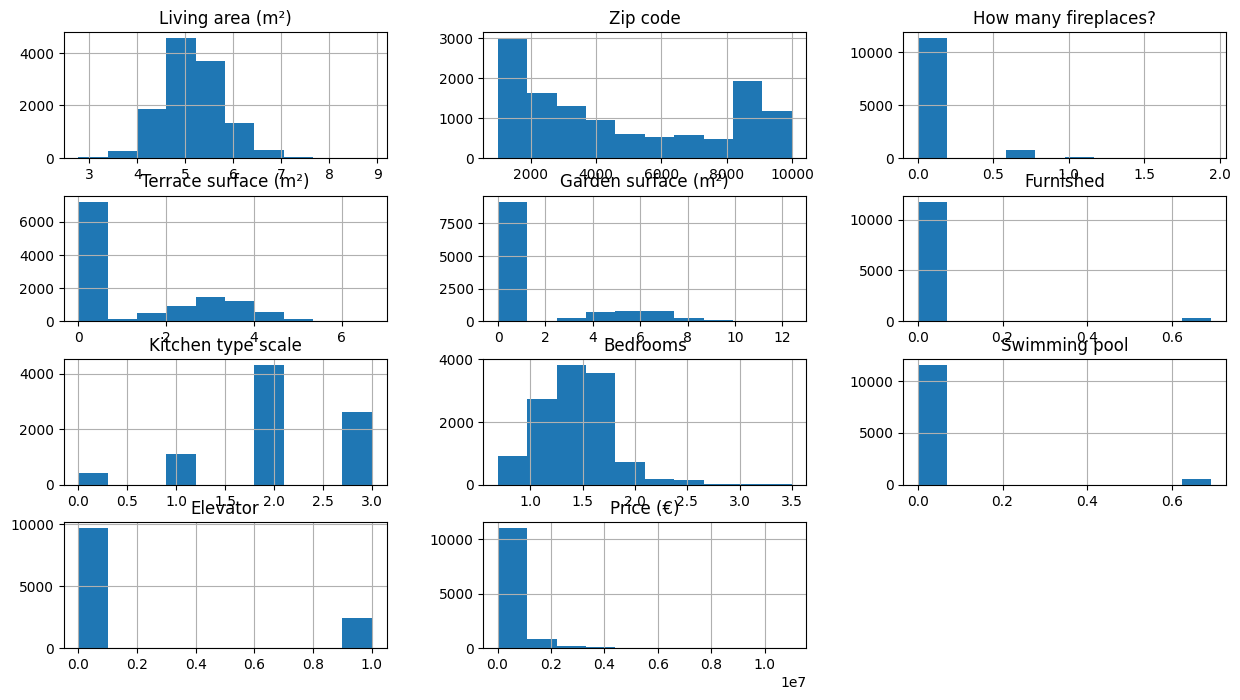

In [313]:
train_data.hist(figsize=(15, 8))

In [314]:
train_data['m2 per room'] = train_data['Living area (m²)'] / train_data['Bedrooms']

<Axes: >

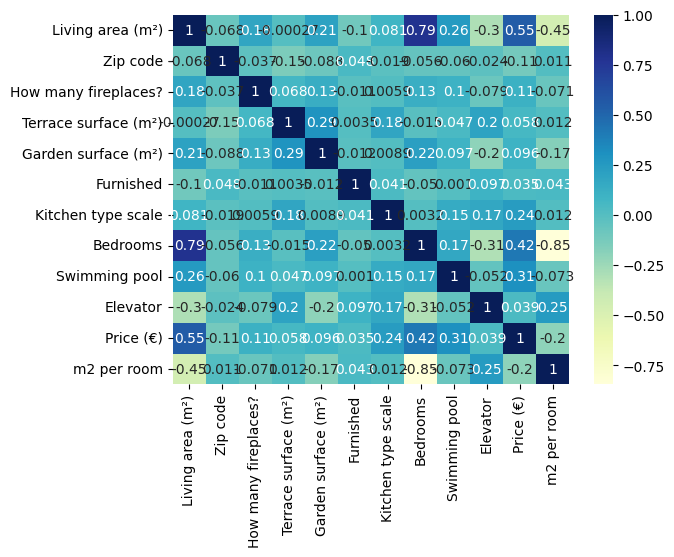

In [315]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [316]:
X_train

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator
1076,250.0,1950,0.0,15.0,156.0,0,2.0,4.0,0,0
10705,192.0,2000,0.0,22.0,0.0,0,3.0,3.0,0,1
2166,120.0,8300,0.0,0.0,0.0,0,NaN,3.0,0,1
1014,147.0,4210,0.0,0.0,3750.0,0,1.0,2.0,0,0
2061,107.0,1210,0.0,0.0,0.0,0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...
11791,231.0,5360,1.0,0.0,0.0,0,2.0,4.0,0,0
1363,126.0,3440,0.0,24.0,416.0,0,NaN,4.0,0,0
2964,203.0,1700,0.0,25.0,2910.0,0,0.0,4.0,0,0
631,275.0,8200,1.0,0.0,0.0,0,NaN,3.0,0,0


In [317]:
X_train = train_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool', 'Elevator']]
y_train = train_data["Price (€)"]

In [318]:
X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)
X_train['Swimming pool'] = X_train['Swimming pool'].replace(np.nan, 0)
X_train

C:\Users\Bevov\AppData\Local\Temp\ipykernel_11788\1495399910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)
C:\Users\Bevov\AppData\Local\Temp\ipykernel_11788\1495399910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Swimming pool'] = X_train['Swimming pool'].replace(np.nan, 0)


,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator
1076,5.525453,1950,0.000000,2.772589,5.056246,0.0,2.0,1.609438,0.0,0
10705,5.262690,2000,0.000000,3.135494,0.000000,0.0,3.0,1.386294,0.0,1
2166,4.795791,8300,0.000000,0.000000,0.000000,0.0,0.0,1.386294,0.0,1
1014,4.997212,4210,0.000000,0.000000,8.229778,0.0,1.0,1.098612,0.0,0
2061,4.682131,1210,0.000000,0.000000,0.000000,0.0,0.0,1.098612,0.0,0
...,...,...,...,...,...,...,...,...,...,...
11791,5.446737,5360,0.693147,0.000000,0.000000,0.0,2.0,1.609438,0.0,0
1363,4.844187,3440,0.000000,3.218876,6.033086,0.0,0.0,1.609438,0.0,0
2964,5.318120,1700,0.000000,3.258097,7.976252,0.0,0.0,1.609438,0.0,0
631,5.620401,8200,0.693147,0.000000,0.000000,0.0,0.0,1.386294,0.0,0


In [319]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [320]:

test_data = X_test.join(y_test)

test_data['Terrace surface (m²)'] = np.log(test_data['Terrace surface (m²)'] + 1)
test_data['Garden surface (m²)'] = np.log(test_data['Garden surface (m²)'] + 1)
test_data['Living area (m²)'] = np.log(test_data['Living area (m²)'] + 1)
test_data['How many fireplaces?'] = np.log(test_data['How many fireplaces?'] + 1)
test_data['Furnished'] = np.log(test_data['Furnished'] + 1)
test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
test_data['Swimming pool'] = np.log(test_data['Swimming pool'] + 1)






In [321]:
test_data['Kitchen type scale'] = X_test['Kitchen type scale'].replace(np.nan, 0)

In [322]:

test_data['Swimming pool'] = X_test['Swimming pool'].replace(np.nan, 0)
#X_test = X_test['Kitchen type scale'].replace(np.nan, 0)

In [323]:
X_test = test_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool', 'Elevator']]
y_test = test_data["Price (€)"]

In [324]:
test_data['m2 per room'] = test_data['Living area (m²)'] / test_data['Bedrooms']

From here owerride code


In [325]:
test_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator,Price (€),m2 per room
2470,5.267858,1410,0.000000,0.000000,6.459904,0.0,2.0,1.609438,0,0,625000,3.273104
365,4.382027,2660,0.000000,2.302585,0.000000,0.0,1.0,1.098612,0,0,170000,3.988693
12624,5.545177,6183,0.000000,0.000000,0.000000,0.0,2.0,1.098612,0,0,325000,5.047438
2916,5.153292,9000,0.000000,0.000000,0.000000,0.0,2.0,1.386294,0,0,975000,3.717314
11593,4.875197,2490,0.000000,0.000000,0.000000,0.0,0.0,1.386294,0,0,368000,3.516712
...,...,...,...,...,...,...,...,...,...,...,...,...
12298,4.653960,3900,0.000000,0.000000,0.000000,0.0,0.0,1.098612,0,1,270000,4.236217
12768,5.303305,4845,0.000000,3.295837,0.000000,0.0,0.0,1.609438,0,0,320000,3.295129
176,5.375278,1410,0.000000,0.000000,7.003974,0.0,2.0,1.386294,0,0,595000,3.877444
5102,5.283204,5060,0.693147,0.000000,0.000000,0.0,2.0,1.386294,0,0,215000,3.811026


In [326]:
reg.score(X_test, y_test)

0.441147387357109

In [327]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [328]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [329]:
X_test

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Elevator
2470,5.267858,1410,0.000000,0.000000,6.459904,0.0,2.0,1.609438,0,0
365,4.382027,2660,0.000000,2.302585,0.000000,0.0,1.0,1.098612,0,0
12624,5.545177,6183,0.000000,0.000000,0.000000,0.0,2.0,1.098612,0,0
2916,5.153292,9000,0.000000,0.000000,0.000000,0.0,2.0,1.386294,0,0
11593,4.875197,2490,0.000000,0.000000,0.000000,0.0,0.0,1.386294,0,0
...,...,...,...,...,...,...,...,...,...,...
12298,4.653960,3900,0.000000,0.000000,0.000000,0.0,0.0,1.098612,0,1
12768,5.303305,4845,0.000000,3.295837,0.000000,0.0,0.0,1.609438,0,0
176,5.375278,1410,0.000000,0.000000,7.003974,0.0,2.0,1.386294,0,0
5102,5.283204,5060,0.693147,0.000000,0.000000,0.0,2.0,1.386294,0,0


In [330]:
forest.score(X_test, y_test)

0.7439808125143197

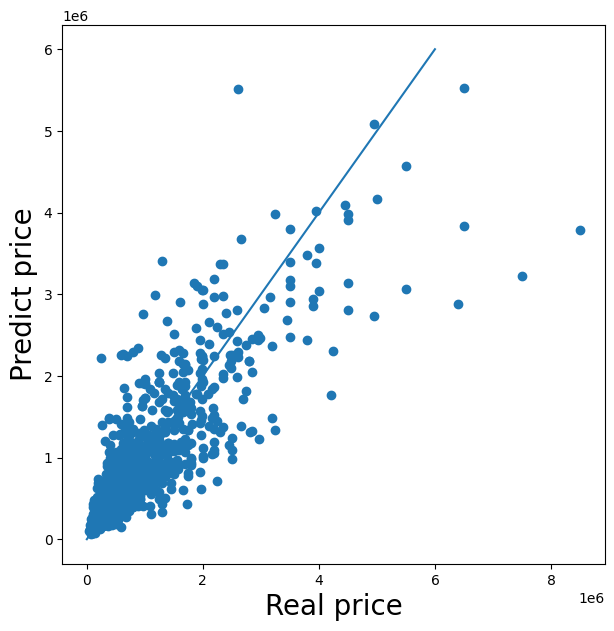

In [331]:
y_pred = forest.predict(X_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
# plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Predict price', fontsize=20);